# CSE4062 Data Science - Delivery #4

## Göksel Tokur - 150116049

## Arda Bayram-150116029

## Gülnihal Erdem - 150319554

## İrem Seçmen - 170219006

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
# Read Data
df = pd.read_csv('../data/training.1600000.processed.noemoticon.csv', header=None, encoding='latin')
df.columns = ['label', 'id', 'date', 'query', 'user', 'tweet']

# Data reduction
df = df.drop(['id', 'date', 'query', 'user'], axis=1)

In [3]:
labels_dict = {0:'Negative', 2:'Neutral', 4:'Positive'}

def convert_labels(label):
    return labels_dict[label]

df.label = df.label.apply(lambda x: convert_labels(x))
df

,label,tweet
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


Text(0.5, 1.0, 'Data Distribution')

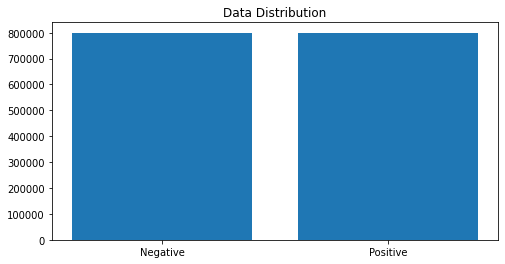

In [4]:
instances = df.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(instances.index, instances.values)
plt.title("Data Distribution")

## Preprocess

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

punctuations_and_dummies = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"



'''
def preprocess(df, will_be_stemmed=False):
    for index, row in df.iterrows():
        tweet = row.tweet
        tweet = re.sub(punctuations_and_dummies, ' ', str(tweet).lower()).strip()
        tokens = []
        for token in tweet.split():
            if token not in stop_words:
                if will_be_stemmed:
                    tokens.append(stemmer.stem(token))
                else:
                    tokens.append(token)
        df.tweet = " ".join(tokens)


preprocess(df.tweet)
'''


def preprocess(tweet, will_be_stemmed=False):
        tweet = re.sub(punctuations_and_dummies, ' ', str(tweet).lower()).strip()
        tokens = []
        for token in tweet.split():
            if token not in stop_words:
                if will_be_stemmed:
                    tokens.append(stemmer.stem(token))
                else:
                    tokens.append(token)
        return " ".join(tokens)
    
df.tweet = df.tweet.apply(lambda tw: preprocess(tw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Remove 0 length tweets
df = df[df.iloc[:,1].astype(str).str.len()!=0]

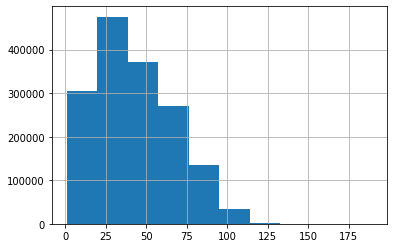

count    1.592328e+06
mean     4.279740e+01
std      2.415896e+01
min      1.000000e+00
25%      2.300000e+01
50%      3.900000e+01
75%      6.000000e+01
max      1.890000e+02
dtype: float64

In [7]:
tweets_len = [len(x) for x in df['tweet']]
pd.Series(tweets_len).hist()
plt.show()
pd.Series(tweets_len).describe()

### Number of Letters

In [8]:
all_str = ""
for i in df.tweet:
    all_str += i

In [9]:
from collections import Counter

letter_list = list(all_str)
my_counter = Counter(letter_list)

letter_df = pd.DataFrame.from_dict(my_counter, orient='index').reset_index()
letter_df = letter_df.rename(columns={'index':'letter', 0:'frequency'})
letter_df = letter_df.loc[letter_df['letter'].isin(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])]
letter_df['all_tweets_relative_freq']=letter_df['frequency']/letter_df['frequency'].sum()
letter_df = letter_df.sort_values('letter')

english = pd.read_csv('../data/letter_frequency_en_US.csv')
english['expected_relative_frequency'] = english['count']/english['count'].sum()
english = english.drop(['count'], axis=1)

letter_df = pd.merge(letter_df, english, on='letter')
letter_df['expected'] = np.round(letter_df['expected_relative_frequency']*letter_df['frequency'].sum(),0)
letter_df = letter_df.reset_index().drop(['index'], axis=1)
letter_df

,letter,frequency,all_tweets_relative_freq,expected_relative_frequency,expected
0,a,4547601,0.078816,0.081238,4687379.0
1,b,975326,0.016904,0.014893,859300.0
2,c,1705409,0.029557,0.027114,1564464.0
3,d,2289515,0.039680,0.043192,2492128.0
4,e,6471295,0.112156,0.120195,6935169.0
5,f,878849,0.015232,0.023039,1329304.0
6,g,2231747,0.038679,0.020257,1168838.0
7,h,2234047,0.038719,0.059215,3416628.0
8,i,3779579,0.065505,0.073054,4215160.0
9,j,143817,0.002493,0.001031,59502.0


<AxesSubplot:ylabel='letter'>

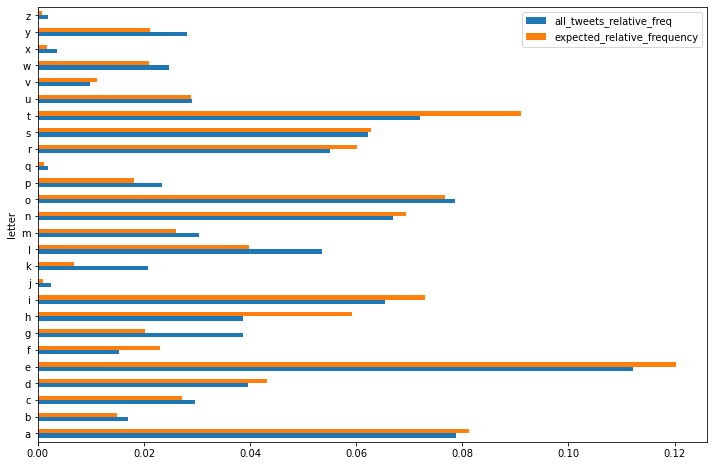

In [10]:
letter_df.plot(x="letter", y=["all_tweets_relative_freq", "expected_relative_frequency"], kind="barh", figsize=(12,8))

#### Compare the Observed Frequencies with the Expected Frequencies in English 

In [11]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(letter_df[['frequency', 'expected']])
p

0.0

We get that the p-value (p) is 0 which implies that the letter frequency does not follow the same distribution with what we see in English tests, although the Pearson correlation is too high (~96.7%).

In [12]:
letter_df[['frequency', 'expected']].corr()

,frequency,expected
frequency,1.000000,0.967421
expected,0.967421,1.000000


In [13]:
df1 = df.copy()

df1['number_of_characters'] = [len(tw) for tw in df1.tweet]
df1

,label,tweet,number_of_characters
0,Negative,awww bummer shoulda got david carr third day,44
1,Negative,upset update facebook texting might cry result...,69
2,Negative,dived many times ball managed save 50 rest go ...,52
3,Negative,whole body feels itchy like fire,32
4,Negative,behaving mad see,16
...,...,...,...
1599995,Positive,woke school best feeling ever,29
1599996,Positive,thewdb com cool hear old walt interviews,40
1599997,Positive,ready mojo makeover ask details,31
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,52


In [14]:
df1.number_of_characters.max()

189

In [15]:
df1.number_of_characters.min()

1

In [16]:
df1.number_of_characters.mean()

42.7974010379771

In [17]:
df1.number_of_characters.std()

24.158961650697616

## Number of Words

In [18]:
df1['number_of_words'] = [len(tw.split()) for tw in df1.tweet]
df1

,label,tweet,number_of_characters,number_of_words
0,Negative,awww bummer shoulda got david carr third day,44,8
1,Negative,upset update facebook texting might cry result...,69,11
2,Negative,dived many times ball managed save 50 rest go ...,52,10
3,Negative,whole body feels itchy like fire,32,6
4,Negative,behaving mad see,16,3
...,...,...,...,...
1599995,Positive,woke school best feeling ever,29,5
1599996,Positive,thewdb com cool hear old walt interviews,40,7
1599997,Positive,ready mojo makeover ask details,31,5
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,52,9


In [19]:
df1.number_of_words.max()

50

In [20]:
df1.number_of_words.min()

1

In [21]:
df1.number_of_words.mean()

7.244474128445898

In [22]:
df1.number_of_words.std()

4.030421805719796

### Positives + Negatives

<BarContainer object of 20 artists>

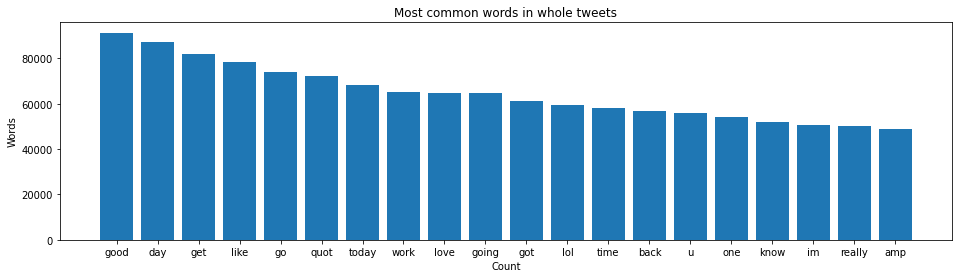

In [23]:
import collections
from wordcloud import WordCloud
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

all_tweets = ' '.join(df['tweet'].str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
plt.figure(figsize = (16, 4))
plt.title('Most common words in whole tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

### Positives

<BarContainer object of 20 artists>

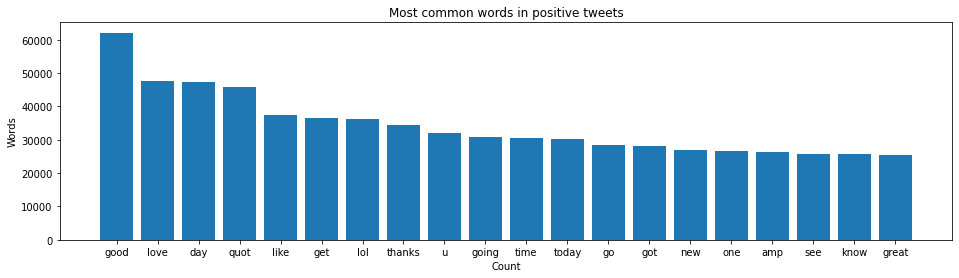

In [24]:
all_tweets = ' '.join(df[df.label == 'Positive'].tweet.str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
plt.figure(figsize = (16, 4))
plt.title('Most common words in positive tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

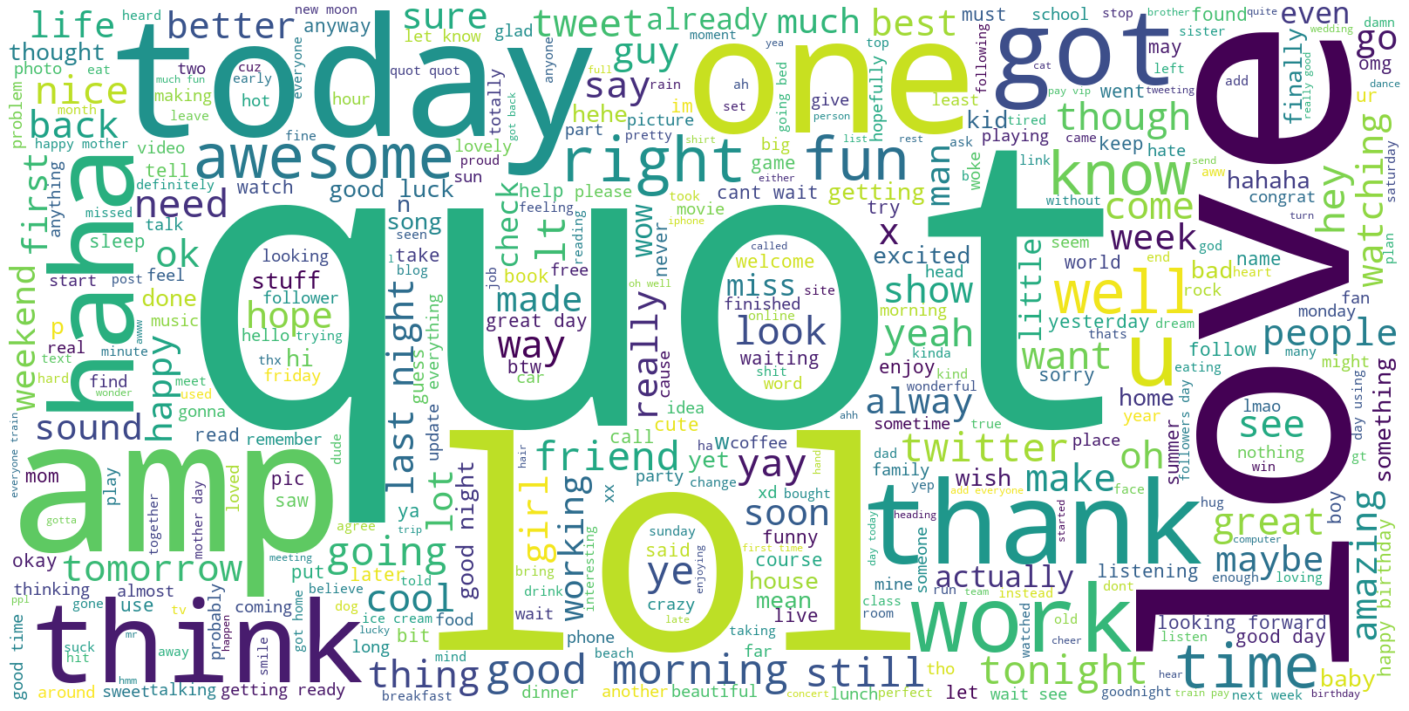

In [25]:
plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Positive'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

### Negatives

<BarContainer object of 20 artists>

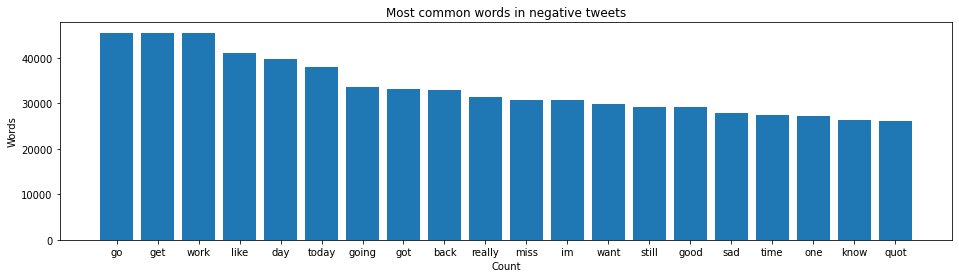

In [26]:
all_tweets = ' '.join(df[df.label == 'Negative'].tweet.str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
plt.figure(figsize = (16, 4))
plt.title('Most common words in negative tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

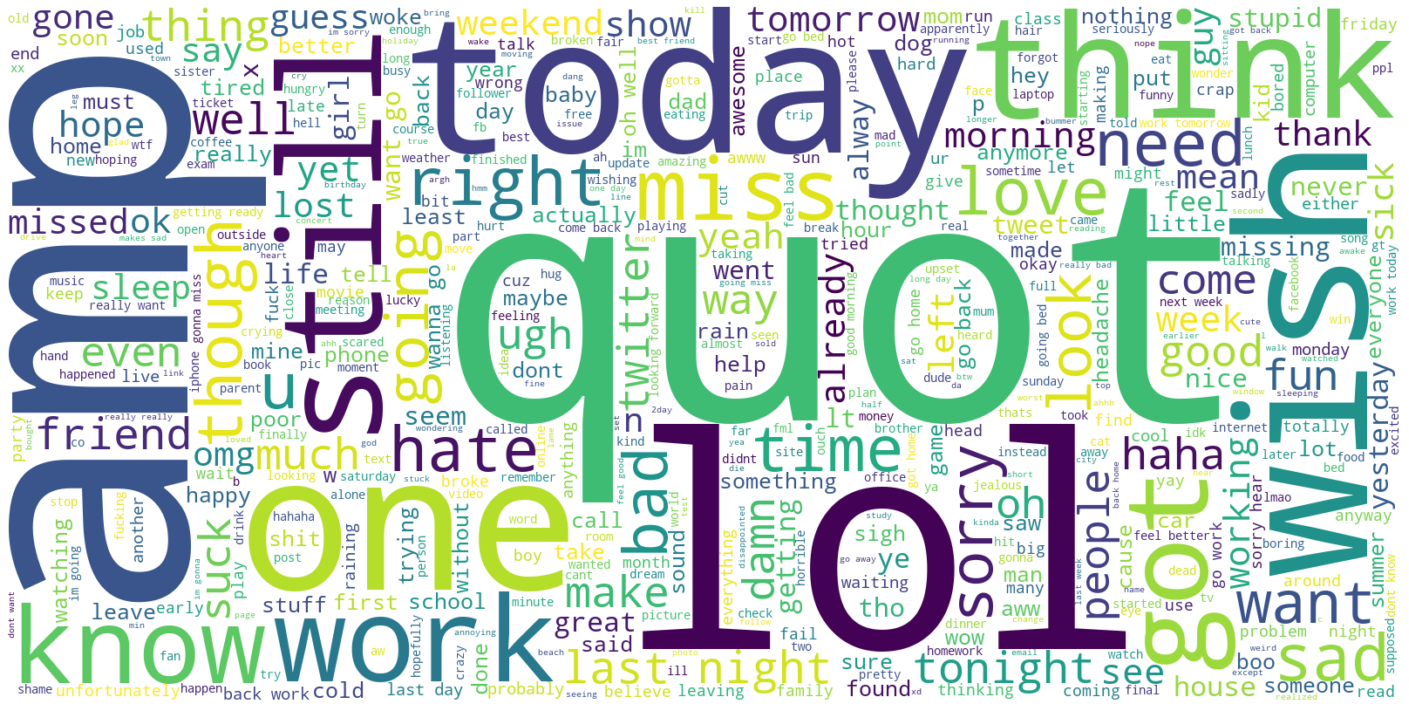

In [27]:
from wordcloud import WordCloud

plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Negative'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

### Training Data and Test Data Splitting

In [28]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=7)
print('Training Data', len(train_data), 'Test Data', len(test_data))

train_data.head(10)

Training Data 1273862 Test Data 318466


,label,tweet
927561,Positive,thank
810082,Positive,shakin money tree headed back car business
1153331,Positive,tasmania okay chat ya later
988182,Positive,yeah 100 tab storm towelled raiders awesome
543405,Negative,happy mari asleep gotta start laundry b4 wakes...
22855,Negative,wanting go city raining gotta homework 2
483675,Negative,sitting home bored x
667231,Negative,miss amy cards
1370823,Positive,dinner hubby two us 10 coupo
94439,Negative,know prob running around


In [29]:
test_data.head(10)

,label,tweet
1414233,Positive,nice job thanks
181653,Negative,way wanna shower n get pretty
788422,Negative,woke early think anyone completely bored
76646,Negative,lucky u scheduled today happy camper lol
972366,Positive,way cute curt hope school raised tons money lo...
797869,Negative,stupid braces making lips dry
1129919,Positive,good miss
1036078,Positive,past days sucked hopefully weekend happier
550532,Negative,marcus doubt megan fox good 2 years might get ...
1365388,Positive,going school contempt fash exams going conquer...


### Tokenization

In [30]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweet)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Using TensorFlow backend.


Vocabulary Size : 290458


In [31]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet), maxlen = 30)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet), maxlen = 30)

print("X_train, X_test", X_train.shape, X_test.shape)

labels = train_data.label.unique().tolist()

X_train, X_test (1273862, 30) (318466, 30)


In [32]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1273862, 1)
y_test shape: (318466, 1)


### GLOVE Embedding

In [33]:
MODELS_PATH = '../models'
EMBEDDING_DIMENSION = 300

In [34]:
import tensorflow as tf

BATCH_SIZE = 1024
EPOCHS = 10
LR = 1e-3

embeddings_index = {}

glove_file = open('../glove/glove.6B.300d.txt', encoding='utf8')
for line in glove_file:
    values = line.split()
    word = value = values[0]
    coefficients = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefficients
glove_file.close()

print('%s word vectors.' % len(embeddings_index))


embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIMENSION))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embedding_layer = tf.keras.layers.Embedding(vocab_size, EMBEDDING_DIMENSION, weights=[embedding_matrix], input_length=30, trainable=False)

400000 word vectors.


## Feature Extraction

### Bag of Words

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

#K = 20000
#shuffled_df = df.sample(frac=1).reset_index(drop=True)
first_K_tweets = train_data['tweet']

vectorizer = CountVectorizer(stop_words='english')
vec = vectorizer.fit(first_K_tweets)

vec = vectorizer.transform(first_K_tweets)

# Dictionary
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000001',
 '000014',
 '00009',
 '0000ff',
 '0001110101001010000111',
 '0001t',
 '000aah',
 '000albums',
 '000followers',
 '000follows',
 '000ft',
 '000g',
 '000gbp',
 '000h',
 '000hrs',
 '000ish',
 '000k',
 '000kg',
 '000km',
 '000kms',
 '000mnt',
 '000pv',
 '000s',
 '000th',
 '000thb',
 '000watts',
 '000webhost',
 '000yrs',
 '001',
 '0010utc',
 '0010x0010',
 '0011000100101011001100010011110100110010',
 '0014',
 '001st',
 '002',
 '0022',
 '003',
 '004',
 '0047',
 '005',
 '0055',
 '0055gb',
 '005mm',
 '006',
 '0069',
 '007',
 '0074',
 '007episode',
 '007peter',
 '008',
 '0084',
 '00a',
 '00am',
 '00b1',
 '00ff00',
 '00g',
 '00ga',
 '00h',
 '00hrs',
 '00hs',
 '00mony00',
 '00o',
 '00p',
 '00pm',
 '00pn',
 '00psz',
 '00th',
 '01',
 '010',
 '0100',
 '01000101',
 '0105',
 '011',
 '01189998819991197253',
 '011iver',
 '012',
 '0130',
 '013th',
 '014',
 '015',
 '016',
 '01614948343',
 '0162970983',
 '017',
 '018',
 '0181',
 '019',
 '0191',
 '01am',
 '01percent',
 '01pm

In [36]:
# TEST Tweets

test_vec = vectorizer.transform(test_data['tweet'])

# Training

### Naive Bayes - CountVectorizer

In [37]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

classifier = MultinomialNB()
classifier.fit(vec, train_data['label'])

MultinomialNB()

In [38]:
y_prediction = classifier.predict(test_vec)
score = (classifier.score(test_vec, test_data['label'])) * 100
print('CountVectorizer Naive Bayes score= '+ str(score) + '%')

CountVectorizer Naive Bayes score= 76.49262401637851%


[[123460  36033]
 [ 38830 120143]]


<AxesSubplot:>

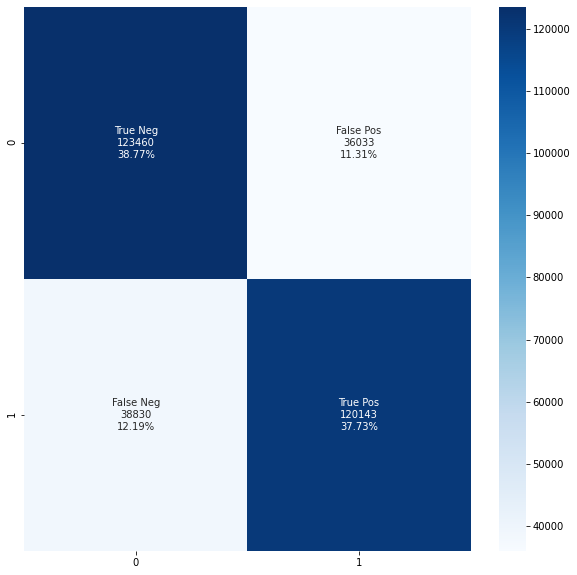

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

cf_matrix = confusion_matrix(test_data['label'], y_prediction)
print(cf_matrix)

plt.figure(figsize = (10,10))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [40]:
print(classification_report(test_data['label'], y_prediction))

              precision    recall  f1-score   support

    Negative       0.76      0.77      0.77    159493
    Positive       0.77      0.76      0.76    158973

    accuracy                           0.76    318466
   macro avg       0.77      0.76      0.76    318466
weighted avg       0.77      0.76      0.76    318466



## Naive Bayes - TFIDF

### TF-IDF Vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Learn vocabulary from tweets 
tfidf_vec = tfidf_vectorizer.fit(first_K_tweets)

# Vocabulary
vectorizer.vocabulary_

{'thank': 252286,
 'shakin': 226150,
 'money': 169957,
 'tree': 260411,
 'headed': 112750,
 'car': 46434,
 'business': 43465,
 'tasmania': 249206,
 'okay': 185688,
 'chat': 50202,
 'ya': 285085,
 'later': 146465,
 'yeah': 286023,
 '100': 412,
 'tab': 247650,
 'storm': 241783,
 'towelled': 259325,
 'raiders': 207386,
 'awesome': 24849,
 'happy': 111171,
 'mari': 159468,
 'asleep': 22519,
 'gotta': 105609,
 'start': 240043,
 'laundry': 146708,
 'b4': 25729,
 'wakes': 274676,
 'bar': 27977,
 'pilates': 196695,
 '2morrow': 3599,
 'slackin': 232170,
 '4real': 5672,
 'wanting': 275135,
 'city': 54020,
 'raining': 207518,
 'homework': 117230,
 'sitting': 231217,
 'home': 117054,
 'bored': 38216,
 'miss': 167586,
 'amy': 17121,
 'cards': 46586,
 'dinner': 71860,
 'hubby': 119258,
 '10': 411,
 'coupo': 60487,
 'know': 142438,
 'prob': 202716,
 'running': 217885,
 'great': 106617,
 'example': 86289,
 'choice': 52370,
 'watch': 275592,
 'good': 104720,
 'news': 178861,
 'week': 276834,
 'said': 2

In [42]:
# Transform to document by term matrix
tfidf_vec = tfidf_vectorizer.transform(first_K_tweets)
#tfidf_vec.toarray()

In [43]:
tfidf_test_vec = tfidf_vectorizer.transform(test_data['tweet'])

### Training - NaiveBayes TFIDF

In [44]:
tfidf_classifier = MultinomialNB()
tfidf_classifier.fit(tfidf_vec, train_data['label'])


MultinomialNB()

In [45]:
y_prediction = tfidf_classifier.predict(tfidf_test_vec)
score = (tfidf_classifier.score(tfidf_test_vec, test_data['label'])) * 100
print("tf-idf Näive_Bayes score = " + str(score) + "%")

tf-idf Näive_Bayes score = 75.89475799614401%


[[122167  37326]
 [ 39441 119532]]


<AxesSubplot:>

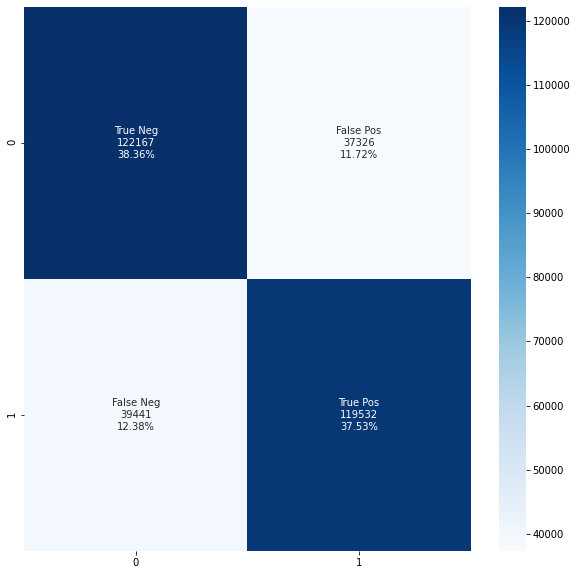

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

cf_matrix = confusion_matrix(test_data['label'], y_prediction)
print(cf_matrix)

plt.figure(figsize = (10,10))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [47]:
print(classification_report(test_data['label'], y_prediction))

              precision    recall  f1-score   support

    Negative       0.76      0.77      0.76    159493
    Positive       0.76      0.75      0.76    158973

    accuracy                           0.76    318466
   macro avg       0.76      0.76      0.76    318466
weighted avg       0.76      0.76      0.76    318466

